<a href="https://colab.research.google.com/github/JoaoDiamantino/clusterization/blob/main/Statistics_I_USP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of Statistics - Python

## Q1


*   Interval classification (cut function)
*   Frequency Table (cumsum function)
*   Pareto's chart



Interval classification (cut function)
Frequency Table (cumsum function)
Pareto's chart
In lending analysis, a potentially important variable is a person's income. A bank manager collects a database of his account holders and extracts the variable “monthly income (R$)” for 50 people. Although it is a quantitative variable, you want to carry out an analysis using a frequency table. In this sense, it is requested:

a) Classify account holders in income brackets, as follows: 0-2,000; 2001-4000;4001-6000; 6,001-8,000; 8,001-10,000 and 10,001-12,000.

b) Next, prepare the frequency table for the above income brackets.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df1 = pd.read_excel('/content/drive/MyDrive/MBA/Estatística/ex1.xlsx')


In [ ]:
df1

,Observação,Renda (R$)
0,1,2893.70
1,2,3448.38
2,3,1460.81
3,4,2223.70
4,5,2500.70
5,6,1100.25
6,7,3560.10
7,8,5510.76
8,9,2900.90
9,10,10127.50


In [ ]:
import numpy as np

intervalo = [0,2000,4000,6000,8000,10000,12000]
nomes = ['0-2.000', '2.001-4.000', '4.001- 6.000', '6.001-8.000','8.001-10.000' ,'10.001-12.000']


In [ ]:
intervalo = pd.cut(x=df1['Renda (R$)'], bins=intervalo, labels=nomes)

In [ ]:
df1['classificação'] = intervalo

In [ ]:
dfClasses = df1.groupby(by = "classificação", as_index = False).agg({'Observação': 'count'})

In [ ]:
dfClasses = dfClasses.sort_values(by = 'classificação',ascending = True).rename(columns ={'Observação':'Freq.Relativa'})
dfClasses

,classificação,Freq.Relativa
0,0-2.000,9
1,2.001-4.000,19
2,4.001- 6.000,11
3,6.001-8.000,5
4,8.001-10.000,4
5,10.001-12.000,2


In [ ]:
dfClasses['%Freq.Relativa'] = dfClasses['Freq.Relativa']/ (dfClasses['Freq.Relativa'].sum())
dfClasses['Freq.Acumulada'] = dfClasses['Freq.Relativa'].cumsum()
dfClasses['%Freq.Acumulda'] = dfClasses['%Freq.Relativa'].cumsum()
dfClasses

,classificação,Freq.Relativa,%Freq.Relativa,Freq.Acumulada,%Freq.Acumulda
0,0-2.000,9,0.18,9,0.18
1,2.001-4.000,19,0.38,28,0.56
2,4.001- 6.000,11,0.22,39,0.78
3,6.001-8.000,5,0.10,44,0.88
4,8.001-10.000,4,0.08,48,0.96
5,10.001-12.000,2,0.04,50,1.00


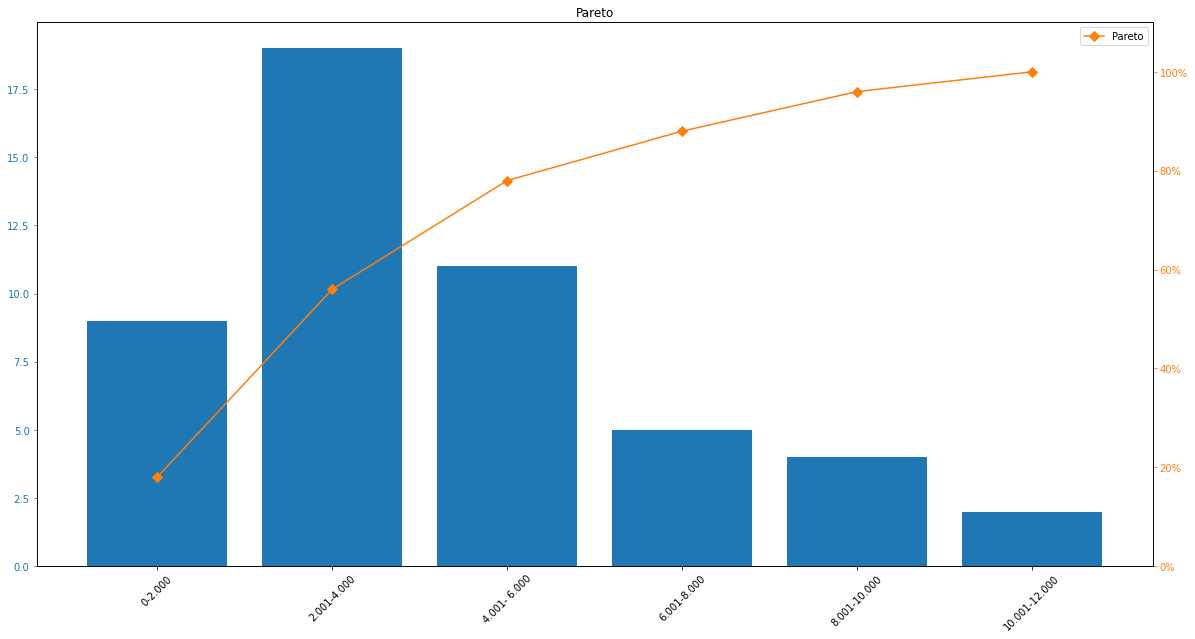

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
# Cria o barplot e define os dados os eixos, a cor das barras, titulo do gráfico
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(dfClasses["classificação"], dfClasses['Freq.Relativa'], color="C0")
ax.set_title("Pareto")

# Eixo secundário
ax2 = ax.twinx()

# Cria a Curva de Pareto no eixo secundário
ax2.plot(dfClasses["classificação"], dfClasses["%Freq.Acumulda"]*100, color="C1", marker="D", ms=7, label='Pareto')
ax2.yaxis.set_major_formatter(PercentFormatter())

# Configurações dos eixos 
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax2.set_ylim([0,110])

# Ajusta a inclinação dos labels do eixo x
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Finalmente mostra o grafico definido acima
plt.legend() # para mostrar a legenda
plt.show()

## Q2

A stock market analyst has collected the monthly returns for two stocks that he intends to
customers. Calculate descriptive statistics for the two variables, including the correlation coefficient between
the returns.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df2 = pd.read_excel('/content/drive/MyDrive/MBA/Estatística/Q2_data.xlsx')

In [3]:
df2

,Months,Stock 1,Stock 2
0,1,-0.021,0.265
1,2,0.244,0.209
2,3,0.230,0.125
3,4,-0.202,0.021
4,5,0.130,0.206
5,6,0.062,0.626
6,7,-0.159,-0.149
7,8,-0.100,0.258
8,9,-0.027,0.172
9,10,0.078,0.020


In [4]:
# rename columns
df2.rename(columns = {'Stock 1':'stock1','Stock 2':'stock2'}, inplace = True)

In [5]:
# converting to object type
df2['Months'] = df2['Months'].astype('object')
print(df2.dtypes)

Months     object
stock1    float64
stock2    float64
dtype: object


In [6]:
# Overall
df2.describe()


,stock1,stock2
count,23.000000,23.000000
mean,0.035304,0.151130
std,0.129280,0.203834
min,-0.202000,-0.149000
25%,-0.061500,0.020500
50%,0.037000,0.125000
75%,0.116500,0.233500
max,0.281000,0.626000


In [7]:
# getting describe() output into a dataframe

df2Descriptive = pd.DataFrame(df2.describe())
df2Descriptive = df2Descriptive.reset_index().rename(columns = {'index': "metrics"})
df2Descriptive

,metrics,stock1,stock2
0,count,23.000000,23.000000
1,mean,0.035304,0.151130
2,std,0.129280,0.203834
3,min,-0.202000,-0.149000
4,25%,-0.061500,0.020500
5,50%,0.037000,0.125000
6,75%,0.116500,0.233500
7,max,0.281000,0.626000


Text(0, 0.5, 'Stock 2')

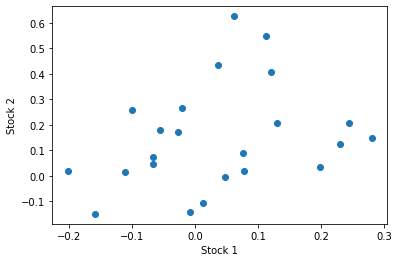

In [13]:
# Scatter plot
import matplotlib.pyplot as plt;


fig = plt.figure()
plt.scatter(df2['stock1'], df2['stock2'])
plt.xlabel('Stock 1')
plt.ylabel('Stock 2')

In [15]:
import numpy as np
# correlation

np.corrcoef(df2['stock1'], df2['stock2'])[0,1]

0.2912977574264325